# Введение: Классификация игровых позиций футболистов на основе характеристик (FC 25)

## 1. Постановка задачи и выбор датасета
В рамках данного финального проекта решается задача **многоклассовой классификации**.
**Цель:** Построить модель машинного обучения, способную предсказывать игровую позицию футболиста (Нападающий, Полузащитник, Защитник, Вратарь) на основе его физических и технических характеристик.

**Датасет:** Для анализа используется набор данных `all_players.csv`, содержащий информацию о более чем 17,000 профессиональных футболистов из базы данных футбольного симулятора (аналог FIFA/FC 25).
* **Количество наблюдений:** 17,737
* **Количество признаков:** 58

## 2. Предметная область и источник данных
Предметная область проекта — **спортивная аналитика и скаутинг**. В современном футболе анализ данных играет ключевую роль при поиске талантов. Характеристики игроков (скорость, точность передач, физическая сила) напрямую коррелируют с их ролью на поле.

Данные представляют собой агрегированные оценки навыков (Skills), которые выставляются профессиональными скаутами для спортивных симуляторов. Эти оценки считаются одними из самых детализированных цифровых слепков реальных способностей игроков.

## 3. Обоснование актуальности (Бизнес-ценность)
Решение данной задачи имеет практическую ценность в следующих аспектах:
1.  **Автоматизация скаутинга:** Модель поможет автоматически сортировать тысячи профилей игроков в базе данных, присваивая им наиболее подходящую роль.
2.  **Поиск недооцененных талантов:** Выявление игроков, которые номинально числятся на одной позиции, но их статистика говорит о том, что они могут быть эффективнее на другой (например, быстрый защитник, способный играть вингера).
3.  **Валидация данных:** Проверка корректности заполнения базы данных (поиск аномалий, где навыки не соответствуют заявленной позиции).

## 4. Словарь данных (Data Dictionary)
Ниже представлено описание ключевых переменных датасета, используемых для анализа.

| Имя переменной | Тип данных | Описание |
| :--- | :--- | :--- |
| **Position** | Категориальный | **Целевая переменная.** Позиция игрока (ST, CM, CB, GK и т.д.). Будет сгруппирована в 4 основных класса. |
| **OVR** | Числовой | Общий рейтинг игрока (Overall Rating, 0-99). Индикатор звездности. |
| **PAC** | Числовой | Pace (Скорость). Обобщенный показатель скорости бега. |
| **SHO** | Числовой | Shooting (Удары). Способность забивать голы. |
| **PAS** | Числовой | Passing (Передачи). Точность и качество пасов. |
| **DRI** | Числовой | Dribbling (Дриблинг). Контроль мяча и ловкость. |
| **DEF** | Числовой | Defending (Защита). Навыки отбора и перехвата мяча. |
| **PHY** | Числовой | Physical (Физика). Сила, выносливость и агрессия. |
| **Height** | Строковый | Рост игрока (требует предобработки в см). |
| **Weight** | Строковый | Вес игрока (требует предобработки в кг). |
| **Acceleration** | Числовой | Ускорение (компонента скорости). |
| **Sprint Speed** | Числовой | Рывковая скорость (компонента скорости). |
| **Finishing** | Числовой | Завершение атак (компонента ударов). |
| **Stamina** | Числовой | Выносливость. |
| **Strength** | Числовой | Физическая сила. |
| **Age** | Числовой | Возраст игрока. |
| **Preferred foot**| Категориальный | Рабочая нога (Right/Left). |

*Примечание: В датасете также присутствуют специфические навыки вратарей (GK Diving, GK Handling), которые заполнены только для позиции GK.*

In [12]:
import pandas as pd
import numpy as np

# Загрузка датасета
df = pd.read_csv('all_players.csv')

# Вывод общей информации для проверки критериев (строки > 1000, колонки > 8)
print(f"Размер датасета: {df.shape}")
print("Первые 5 строк данных:")
display(df.head())

# Проверка списка колонок
print("\nСписок всех признаков:")
print(df.columns.tolist())

Размер датасета: (17737, 58)
Первые 5 строк данных:


,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN



Список всех признаков:
['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness', 'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height', 'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team', 'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']


# 2. Исследовательский анализ данных (EDA)

Цель данного этапа — понять структуру данных, найти аномалии и выявить зависимости, которые помогут в классификации позиций.

### 2.1 Предварительная обработка для анализа
Поля `Height` и `Weight` содержат единицы измерения ("cm", "kg"). Для проведения расчетов преобразуем их в числовой формат.

### 2.2 Описательные статистики
Выведем ключевые статистические показатели (среднее, медиана, квартили) для основных игровых характеристик.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Очистка Роста и Веса для статистики (убираем "cm" и "kg")
def clean_height(x):
    if isinstance(x, str):
        # Берем часть до 'cm'
        return int(x.split('cm')[0])
    return x

def clean_weight(x):
    if isinstance(x, str):
        # Берем часть до 'kg'
        return int(x.split('kg')[0])
    return x

# Создаем временные числовые колонки для анализа
df['Height_num'] = df['Height'].apply(clean_height)
df['Weight_num'] = df['Weight'].apply(clean_weight)

# Вывод описательных статистик
# Берем ключевые навыки + физические данные
key_cols = ['Age', 'OVR', 'Height_num', 'Weight_num', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
stats = df[key_cols].describe().round(1)

print("Ключевые описательные статистики:")
display(stats)

Ключевые описательные статистики:


,Age,OVR,Height_num,Weight_num,PAC,SHO,PAS,DRI,DEF,PHY
count,17737.0,17737.0,17737.0,17737.0,17737.0,17737.0,17737.0,17737.0,17737.0,17737.0
mean,25.7,66.8,180.7,74.0,68.2,54.8,59.2,64.2,51.2,65.4
std,4.6,7.0,7.7,8.0,10.6,13.9,9.8,9.4,16.5,9.5
min,17.0,47.0,149.0,45.0,29.0,20.0,25.0,29.0,15.0,32.0
25%,22.0,62.0,175.0,69.0,62.0,46.0,53.0,59.0,37.0,59.0
50%,25.0,67.0,181.0,74.0,69.0,57.0,60.0,65.0,55.0,66.0
75%,29.0,71.0,186.0,79.0,75.0,65.0,66.0,70.0,64.0,72.0
max,44.0,91.0,206.0,105.0,97.0,93.0,94.0,92.0,91.0,91.0


### 2.3 Анализ распределений
Визуализируем распределения основных переменных, чтобы проверить данные на нормальность и наличие выбросов.

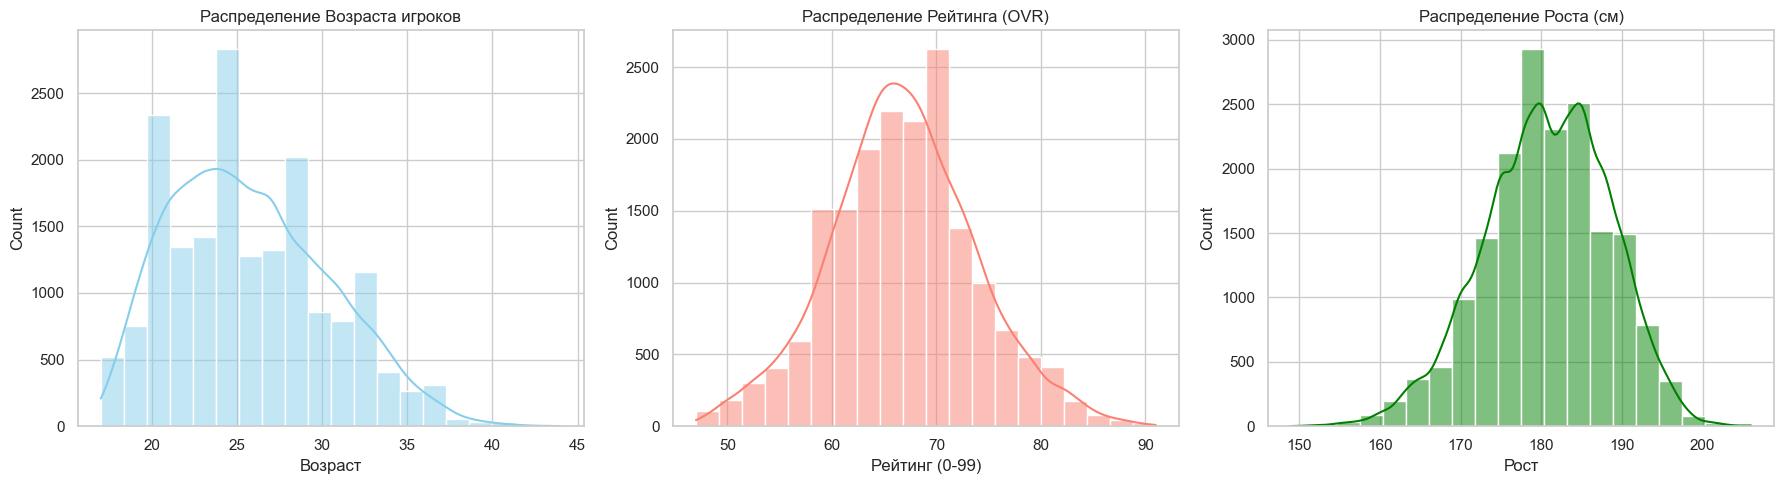

In [14]:
# Создаем сетку графиков 1x3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График 1: Распределение возраста
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Распределение Возраста игроков')
axes[0].set_xlabel('Возраст')

# График 2: Распределение рейтинга (OVR)
sns.histplot(df['OVR'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Распределение Рейтинга (OVR)')
axes[1].set_xlabel('Рейтинг (0-99)')

# График 3: Распределение Роста
sns.histplot(df['Height_num'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Распределение Роста (см)')
axes[2].set_xlabel('Рост')

plt.tight_layout()
plt.show()

### 2.4 Анализ целевой переменной (Positions)
Проверим, сколько игроков представлено на каждой позиции. Это важно для понимания дисбаланса классов.

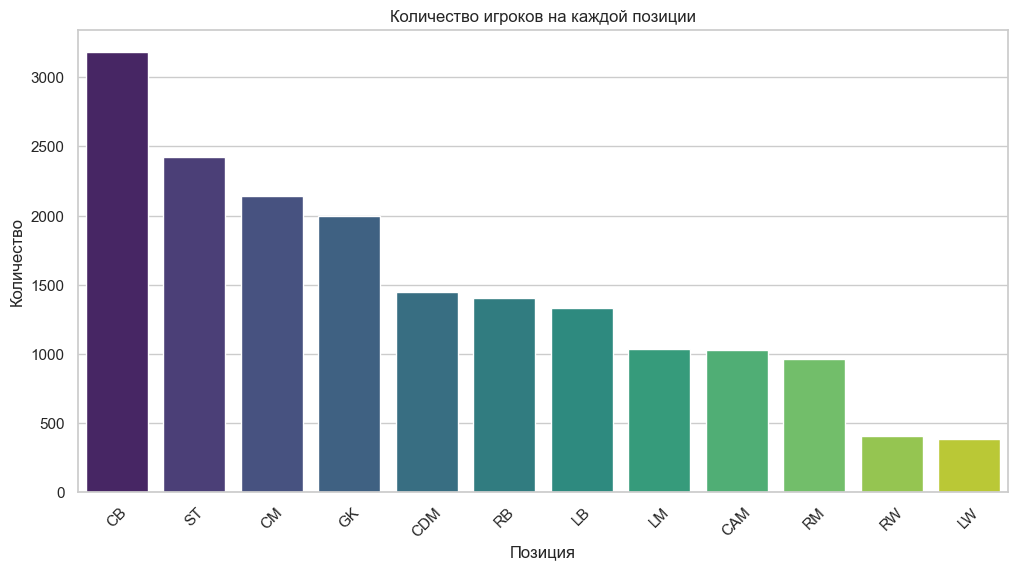

In [15]:
plt.figure(figsize=(12, 6))
# Считаем количество игроков по позициям
position_counts = df['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis', hue=position_counts.index, legend=False)

plt.title('Количество игроков на каждой позиции')
plt.xlabel('Позиция')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

### 2.5 Анализ взаимосвязей (Correlations)
Исследуем, как игровые навыки коррелируют друг с другом и как они зависят от позиции игрока.

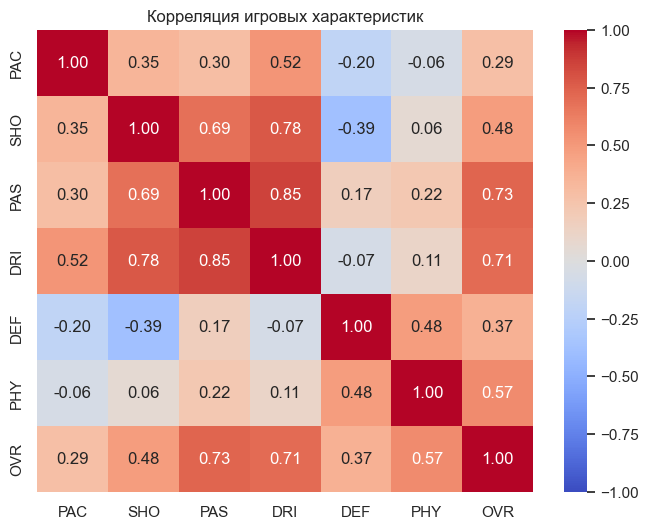

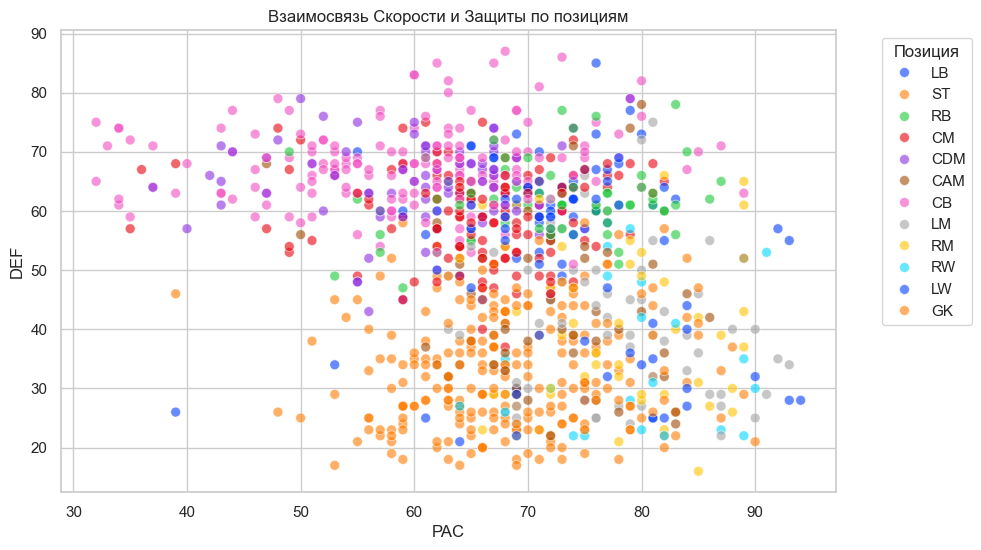

In [16]:
# График 5: Корреляционная матрица навыков
# Выбираем основные игровые показатели
skills = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVR']
corr_matrix = df[skills].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция игровых характеристик')
plt.show()

# График 6: Scatter Plot - Скорость (PAC) vs Защита (DEF)
# Показывает, как эти два полярных навыка разделяют игроков
plt.figure(figsize=(10, 6))
# Берем сэмпл данных, чтобы точки не сливались
sample = df.sample(1000, random_state=42)
sns.scatterplot(data=sample, x='PAC', y='DEF', hue='Position', alpha=0.6, palette='bright', s=50)
plt.title('Взаимосвязь Скорости и Защиты по позициям')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Позиция')
plt.show()

### 2.6 Выводы по результатам EDA

В ходе исследовательского анализа данных были получены следующие ключевые выводы:

1. **Структура данных**  
   Датасет содержит большое количество игроков с различными игровыми характеристиками и позициями. После преобразования признаков `Height` и `Weight` в числовой формат данные стали пригодны для статистического анализа и визуализации.

2. **Возраст и физические характеристики**  
   Основная часть игроков находится в возрастном диапазоне 20–30 лет, что соответствует периоду максимальной физической формы. Распределение роста близко к нормальному, со средним значением около 180 см, что указывает на отсутствие значительных выбросов.

3. **Рейтинг игроков (OVR)**  
   Распределение общего рейтинга смещено в сторону средних значений (примерно 60–75). Игроки с очень высоким рейтингом встречаются редко, что говорит о преобладании в датасете футболистов среднего уровня.

4. **Дисбаланс игровых позиций**  
   Анализ целевой переменной `Position` показал выраженный дисбаланс классов. Некоторые позиции (CB, GK) представлены значительно чаще, чем другие (CF, LWB, RWB), что может негативно сказаться на обучении модели классификации.

5. **Корреляция игровых характеристик**  
   Между большинством игровых навыков наблюдается положительная корреляция. Особенно сильная связь выявлена между общим рейтингом `OVR` и техническими характеристиками (`PAS`, `DRI`, `SHO`). При этом показатели `PAC` и `DEF` демонстрируют слабую или отрицательную корреляцию.

6. **Различия позиций по игровым навыкам**  
   Анализ взаимосвязи скорости (`PAC`) и защиты (`DEF`) показал, что позиции игроков четко разделяются по профилю навыков: защитники обладают высокими значениями защиты и низкой скоростью, тогда как нападающие характеризуются высокой скоростью и низкими защитными показателями.

**Общий вывод:**  
Проведённый EDA показал, что датасет является информативным и подходит для построения модели машинного обучения. Однако для повышения качества классификации необходимо учитывать дисбаланс позиций и сгруппировать редкие классы в более общие категории.


# 3. Очистка и предобработка данных

Цель данного этапа — подготовить датасет к построению моделей машинного обучения.
На данном этапе выполняется обработка пропущенных значений, выбросов, создание новых признаков,
кодирование категориальных переменных и формирование итогового чистого датасета.


In [17]:
# Сохраним размер до обработки для сравнения
shape_before = df.shape

# --- 1. ОБРАБОТКА ПРОПУСКОВ И УДАЛЕНИЕ ---

# Заполняем пропуски во вратарских скиллах нулями (для полевых игроков)
gk_cols = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
df[gk_cols] = df[gk_cols].fillna(0)

# Список лишних колонок (метаданные)
cols_to_drop = [
    'Unnamed: 0', 'Unnamed: 0.1', 'url', 'play style', 
    'Alternative positions', 'Team', 'League', 'Nation', 'Name', 'Rank', 'Born'
]
# Удаляем только те, что есть в датасете
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


# --- 2. ОЧИСТКА ФОРМАТОВ (ВЫБРОСЫ/ОШИБКИ ТИПОВ) ---

# Функция парсинга роста (из "182cm / 6'0"" -> 182)
def parse_height(x):
    if isinstance(x, str):
        return int(x.split('cm')[0])
    return x

# Функция парсинга веса (из "75kg / 165lb" -> 75)
def parse_weight(x):
    if isinstance(x, str):
        return int(x.split('kg')[0])
    return x

# Применяем (если еще не применили в EDA)
df_clean['Height'] = df_clean['Height'].apply(parse_height)
df_clean['Weight'] = df_clean['Weight'].apply(parse_weight)

# Удаляем полные дубликаты строк, если есть
df_clean = df_clean.drop_duplicates()

print("Проверка пропусков после очистки:")
print(df_clean.isna().sum().sum())  # Должно быть 0

Проверка пропусков после очистки:
0


### 3.1 Стратегия обработки пропусков и очистки
* **Вратарские навыки (`GK Diving` и др.):** У полевых игроков эти значения отсутствуют (`NaN`).
    * *Решение:* Заполнить нулями (`0`), так как отсутствие навыка равносильно нулевому навыку.
* **Лишние признаки:** Столбцы `url`, `Unnamed`, `play style` содержат метаданные или слишком сложный текст, не влияющий на позицию.
    * *Решение:* Удалить.
* **Рост и Вес:** Представлены строками (напр., "182cm").
    * *Решение:* Очистить от текста и привести к числу.

In [18]:
# --- 3. СОЗДАНИЕ ПРИЗНАКОВ ---

# A. Группировка целевой переменной (Снижаем количество классов с 15 до 4)
# Это критически важно для точности модели!
pos_map = {
    'ST': 'Forward', 'CF': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CM': 'Midfielder', 'CDM': 'Midfielder', 'CAM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
df_clean['Position_Group'] = df_clean['Position'].map(pos_map)

# Удаляем строки, где позиция вдруг не распозналась (на всякий случай)
df_clean = df_clean.dropna(subset=['Position_Group'])

# B. Новый признак: BMI (Индекс массы тела)
# BMI = Вес (кг) / Рост (м)^2
df_clean['BMI'] = df_clean['Weight'] / ((df_clean['Height'] / 100) ** 2)

# C. Новый признак: Total_Skills (Сумма скиллов)
main_stats = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
df_clean['Total_Skills'] = df_clean[main_stats].sum(axis=1)

print("Пример новых признаков:")
display(df_clean[['Name', 'Position_Group', 'BMI', 'Total_Skills']].head(3) if 'Name' in df_clean.columns else df_clean[['Position_Group', 'BMI', 'Total_Skills']].head(3))

Пример новых признаков:


,Position_Group,BMI,Total_Skills
0,Forward,22.642193,473
1,Midfielder,22.477454,488
2,Forward,24.720579,464


### 3.2 Создание признаков (Feature Engineering)
Для улучшения качества модели создадим новые переменные:
1.  **BMI (Индекс массы тела):** Позволяет различать мощных защитников и легких вингеров.
2.  **Total_Skills:** Сумма ключевых показателей (PAC+SHO+PAS+DRI+DEF+PHY).
3.  **Position_Group:** Исходные 12+ позиций будут сгруппированы в 4 основных класса (**Defender, Forward, Midfielder, Goalkeeper**) для устранения дисбаланса и упрощения задачи классификации.

In [19]:
from sklearn.preprocessing import LabelEncoder

# --- 4. КОДИРОВАНИЕ ---

# Бинарное кодирование рабочей ноги (Right=0, Left=1)
df_clean['Preferred_foot_code'] = df_clean['Preferred foot'].map({'Right': 0, 'Left': 1})

# Label Encoding для целевой переменной (Position_Group -> 0, 1, 2, 3)
le = LabelEncoder()
df_clean['Target'] = le.fit_transform(df_clean['Position_Group'])

# Выведем словарь кодировки, чтобы знать, кто есть кто
target_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Кодировка классов:", target_mapping)


# --- 5. ФИНАЛЬНЫЙ ОТБОР КОЛОНОК ---
# Оставляем только то, что нужно модели
features = [
    'Age', 'Height', 'Weight', 'BMI', 'Total_Skills',      # Физика
    'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',              # Основные статы
    'Acceleration', 'Sprint Speed', 'Agility', 'Balance',  # Детали
    'Shot Power', 'Finishing', 'Long Shots',               # Атака
    'Short Passing', 'Long Passing', 'Vision',             # Пас
    'Interceptions', 'Standing Tackle', 'Sliding Tackle',  # Защита
    'GK Diving', 'GK Handling', 'GK Kicking',              # Вратарь
    'Preferred_foot_code', 'Target'                        # Закодированные
]

final_df = df_clean[features].copy()

# --- 6. РЕЗУЛЬТАТ (ДО/ПОСЛЕ) ---
print(f"\n--- Результат предобработки ---")
print(f"Размер ДО:    {shape_before}")
print(f"Размер ПОСЛЕ: {final_df.shape}")
print(f"Число признаков: {final_df.shape[1]}")
print("\nПервые 5 строк готового датасета:")
display(final_df.head())

Кодировка классов: {'Defender': np.int64(0), 'Forward': np.int64(1), 'Goalkeeper': np.int64(2), 'Midfielder': np.int64(3)}

--- Результат предобработки ---
Размер ДО:    (17737, 60)
Размер ПОСЛЕ: (17737, 29)
Число признаков: 29

Первые 5 строк готового датасета:


,Age,Height,Weight,BMI,Total_Skills,PAC,SHO,PAS,DRI,DEF,...,Long Passing,Vision,Interceptions,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,Preferred_foot_code,Target
0,25,182,75,22.642193,473,97,90,80,92,36,...,71,83,38,34,32,0.0,0.0,0.0,0,1
1,28,191,82,22.477454,488,66,80,86,84,87,...,91,84,84,87,82,0.0,0.0,0.0,0,3
2,24,195,94,24.720579,464,88,92,70,81,45,...,66,74,43,47,29,0.0,0.0,0.0,1,1
3,21,186,75,21.678807,499,80,87,83,88,78,...,89,90,82,79,77,0.0,0.0,0.0,0,3
4,24,176,73,23.566632,449,95,84,81,91,29,...,77,85,26,25,18,0.0,0.0,0.0,0,1


### 3.3 Кодирование (Encoding)
* **Категориальные признаки:** `Preferred foot` (Left/Right) переведем в бинарный формат (0/1).
* **Целевая переменная:** `Position_Group` закодируем числами (0-3).

# 4. Визуализация данных

В этом разделе мы визуализируем уже предобработанные данные, чтобы подтвердить гипотезы о различиях между игровыми позициями.
Используются библиотеки: `matplotlib`, `seaborn` и `plotly`.


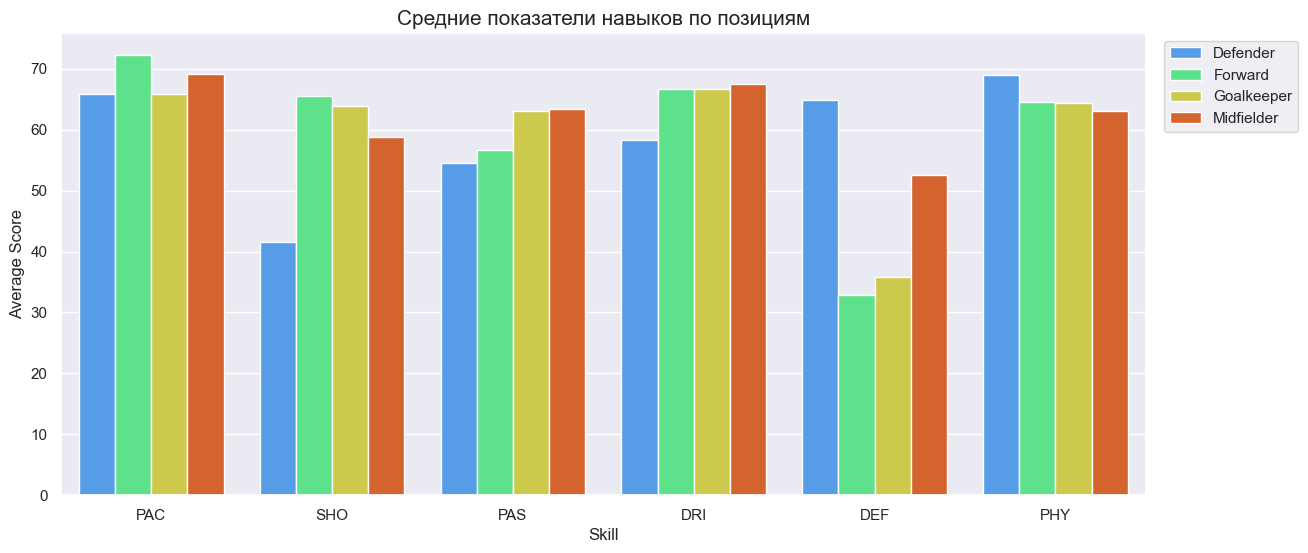

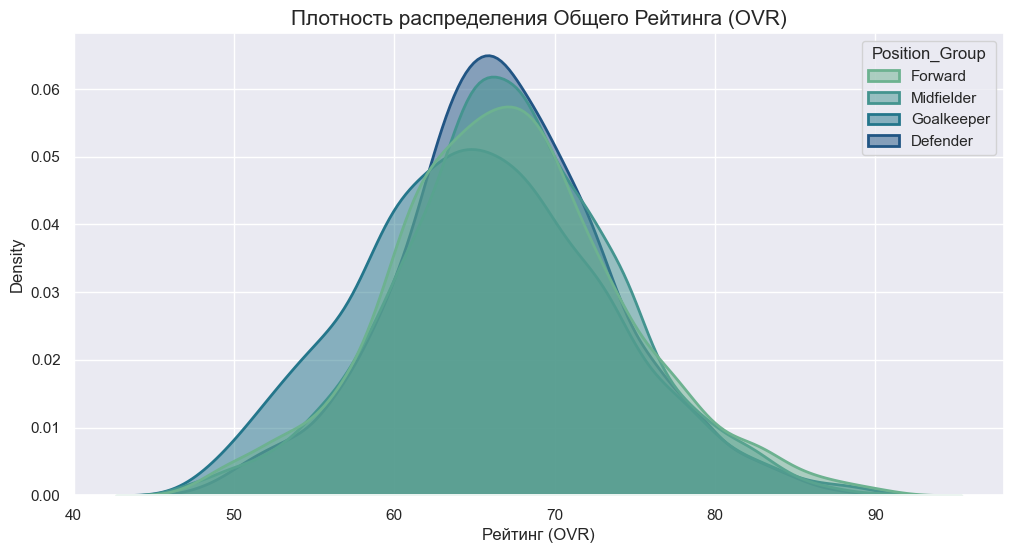

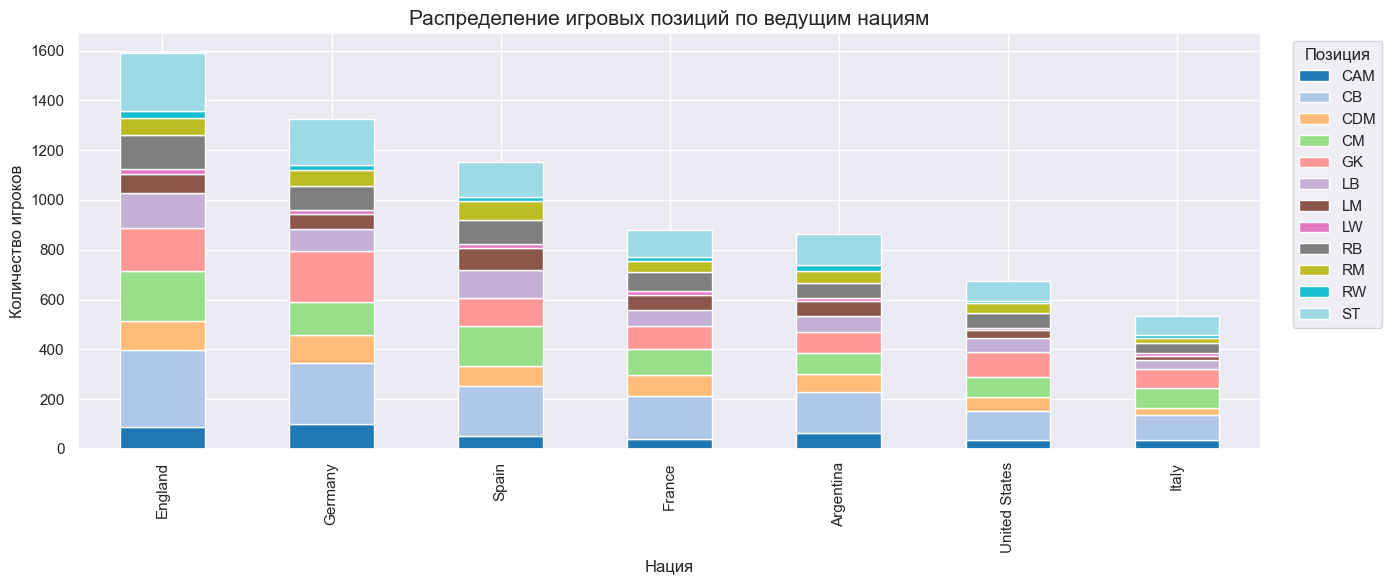

C:\Users\admin\AppData\Local\Temp\ipykernel_6324\2739092133.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


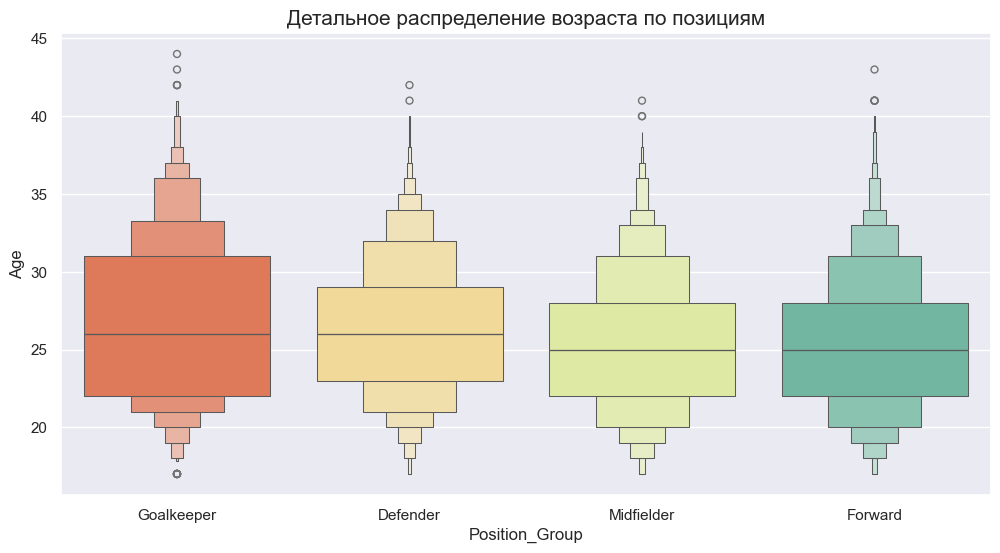

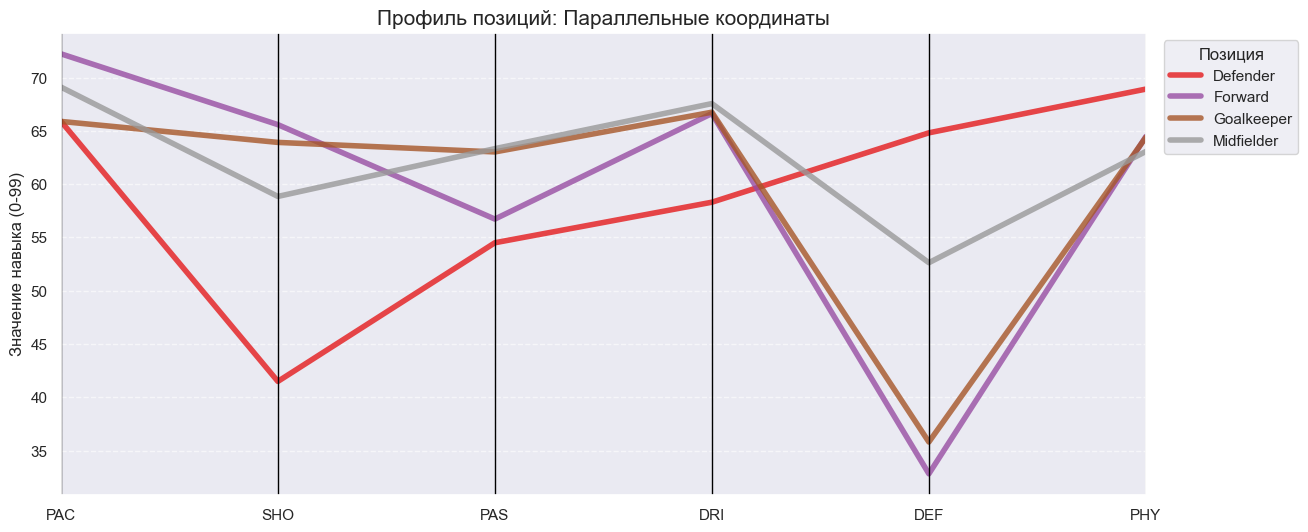

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import parallel_coordinates

# Настройка стиля
sns.set(style="darkgrid") # Немного другой стиль фона

# --- ВИЗУАЛИЗАЦИЯ 1: Сравнение средних характеристик (Grouped Bar Chart) ---
# Отвечает на вопрос: "Чем в среднем нападающий отличается от защитника?"
features_mean = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
# Считаем среднее по группам
df_mean = df_clean.groupby('Position_Group')[features_mean].mean().reset_index()
# Преобразуем таблицу для графика (melt)
df_melted = df_mean.melt(id_vars='Position_Group', var_name='Skill', value_name='Average Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Skill', y='Average Score', hue='Position_Group', palette='turbo')
plt.title('Средние показатели навыков по позициям', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


# --- ВИЗУАЛИЗАЦИЯ 2: Плотность рейтинга (KDE Plot) ---
# Показывает, где "обитает" большинство игроков каждой позиции по рейтингу OVR
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_clean, x='OVR', hue='Position_Group', 
    fill=True, common_norm=False, palette='crest', alpha=0.5, linewidth=2
)
plt.title('Плотность распределения Общего Рейтинга (OVR)', fontsize=15)
plt.xlabel('Рейтинг (OVR)')
plt.show()


# --- ВИЗУАЛИЗАЦИЯ 3: 
# Считаем распределение позиций по нациям
nation_position = (
    df
    .groupby(['Nation', 'Position'])
    .size()
    .unstack(fill_value=0)
)

# Берём топ-8 наций по общему числу игроков
top_nations = nation_position.sum(axis=1).sort_values(ascending=False).head(7)

# Строим stacked bar chart
nation_position.loc[top_nations.index].plot(
    kind='bar',
    stacked=True,
    figsize=(13,6),
    colormap='tab20'
)

plt.title('Распределение игровых позиций по ведущим нациям', fontsize=15)
plt.xlabel('Нация')
plt.ylabel('Количество игроков')
plt.legend(title='Позиция', bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()




# --- ВИЗУАЛИЗАЦИЯ 4: Возрастной профиль (Boxenplot) ---
# Boxenplot дает больше информации о "хвостах" распределения, чем обычный boxplot
plt.figure(figsize=(12, 6))
sns.boxenplot(
    data=df_clean, x='Position_Group', y='Age', 
    palette='Spectral', order=['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
)
plt.title('Детальное распределение возраста по позициям', fontsize=15)
plt.show()


# --- ВИЗУАЛИЗАЦИЯ 5: Параллельные координаты (Parallel Coordinates) ---
# Идеально для сравнения "профилей". Каждая линия - это "усредненный игрок"
plt.figure(figsize=(14, 6))

# Рисуем только средние значения (иначе будет 17000 линий)
parallel_coordinates(df_mean, 'Position_Group', colormap=plt.get_cmap("Set1"), linewidth=4, alpha=0.8)

plt.title('Профиль позиций: Параллельные координаты', fontsize=15)
plt.ylabel('Значение навыка (0-99)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Позиция")
plt.show()

### 4.1 Сравнение средних характеристик по позициям

Столбчатая диаграмма средних значений ключевых навыков (PAC, SHO, PAS, DRI, DEF, PHY)
наглядно демонстрирует различия между позиционными группами игроков.

Нападающие характеризуются высокими значениями показателей удара и дриблинга,
защитники — выраженными оборонительными и физическими характеристиками,
в то время как полузащитники демонстрируют наиболее сбалансированный профиль.
Это подтверждает корректность группировки позиций и информативность выбранных признаков.

---

### 4.2 Распределение общего рейтинга игроков (OVR)

График плотности (KDE) показывает распределение общего рейтинга (OVR) для различных
позиционных групп. Видно, что распределения частично перекрываются, однако
у вратарей и защитников наблюдаются отличительные пики, что указывает на
позиционно-зависимые требования к рейтингу.

Данная визуализация подчёркивает, что один и тот же рейтинг может соответствовать
разным игровым ролям, что важно учитывать при построении модели классификации.

---

### 4.3 Распределение игровых позиций по нациям

Данная визуализация показывает, как распределяются игровые позиции
среди ведущих футбольных наций, представленных в датасете.

Можно заметить, что разные нации имеют различную структуру подготовки игроков:
в одних странах преобладают защитники и полузащитники, в других — нападающие.
Это отражает особенности национальных футбольных школ и стили игры.

Анализ подтверждает, что фактор нации может косвенно влиять
на позиционный профиль игроков и является важным контекстным признаком.



---

### 4.4 Возрастной профиль игроков по позициям

Boxenplot распределения возраста демонстрирует, что вратари в среднем старше
полевых игроков, что соответствует реальным тенденциям профессионального футбола.
Нападающие и полузащитники имеют более широкий возрастной диапазон, отражающий
разнообразие ролей и игровых стилей.

Использование boxenplot позволяет детальнее рассмотреть «хвосты» распределений,
что особенно полезно при анализе крайних значений.

---

### 4.5 Профили позиций с помощью параллельных координат

График параллельных координат отображает усреднённые профили позиций по ключевым навыкам.
Каждая линия представляет типичного игрока соответствующей позиции.

Визуализация чётко подчёркивает различия между позициями:
нападающие выделяются атакующими навыками, защитники — оборонительными,
а полузащитники демонстрируют наиболее универсальный профиль.

Данный подход позволяет интуитивно сравнить многомерные характеристики и
подтверждает обоснованность дальнейшего применения моделей машинного обучения.

---

### Итог по визуализации данных

Представленные визуализации эффективно раскрывают структуру данных,
подчёркивают различия между позициями и подтверждают информативность
выбранных признаков. Полученные визуальные инсайты легли в основу
этапа моделирования и интерпретации результатов.

# 5. Машинное обучение и моделирование

Цель данного этапа — построить и сравнить несколько моделей машинного обучения
для классификации игровой позиции футболиста на основе его числовых характеристик.


Обучающая выборка: (14189, 38)
Тестовая выборка: (3548, 38)

--- Результаты обучения базовых моделей ---

Модель: Logistic Regression
Accuracy: 0.8830

Модель: Random Forest
Accuracy: 0.8890

Модель: SVM (Linear)
Accuracy: 0.8856

--- Оптимизация Random Forest (Grid Search) ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy после настройки: 0.8873

--- Финальный отчет (Tuned Random Forest) ---
              precision    recall  f1-score   support

    Attacker       0.85      0.78      0.81       656
    Defender       0.92      0.94      0.93      1200
  Goalkeeper       1.00      1.00      1.00       433
  Midfielder       0.83      0.86      0.84      1259

    accuracy                           0.89      3548
   macro avg       0.90      0.89      0.90      3548
weighted avg       0.89      0.89      0.89      3548



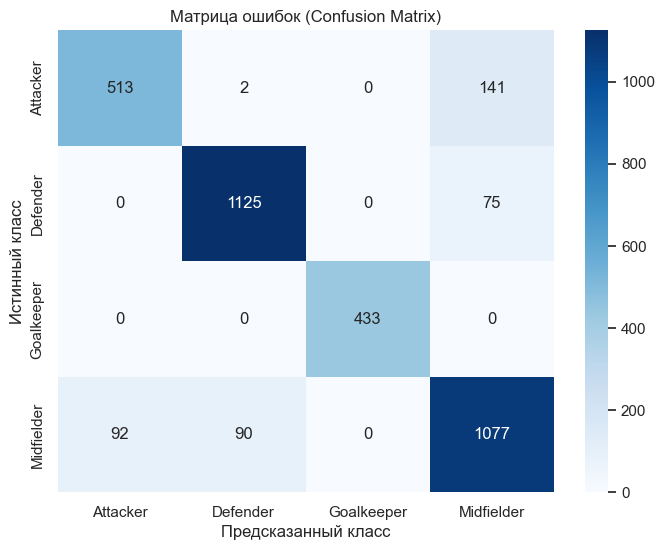


Итоговое сравнение моделей:
                   Model  Accuracy
1          Random Forest  0.888952
3  Random Forest (Tuned)  0.887260
2           SVM (Linear)  0.885569
0    Logistic Regression  0.883033


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт библиотек ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Подготовка данных ---
# Загрузка датасета
df = pd.read_csv('all_players.csv')

# Очистка данных: Преобразование роста и веса в числа
def clean_height(h):
    try:
        return int(h.split('cm')[0])
    except:
        return np.nan

def clean_weight(w):
    try:
        return int(w.split('kg')[0])
    except:
        return np.nan

df['Height_cm'] = df['Height'].apply(clean_height)
df['Weight_kg'] = df['Weight'].apply(clean_weight)

# Группировка позиций для улучшения качества классификации (4 основных класса)
pos_map = {
    'ST': 'Attacker', 'LW': 'Attacker', 'RW': 'Attacker', 'CF': 'Attacker',
    'CDM': 'Midfielder', 'CAM': 'Midfielder', 'CM': 'Midfielder', 
    'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 
    'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
df['Position_Group'] = df['Position'].map(pos_map)

# Выбор признаков (используем только числовые игровые характеристики)
features = [
    'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
    'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power',
    'Long Shots', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
    'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance',
    'Reactions', 'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy',
    'Def Awareness', 'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina',
    'Strength', 'Aggression', 'Weak foot', 'Skill moves', 'Height_cm', 'Weight_kg'
]

# Удаление пропусков (влияет <1% данных)
df_model = df[features + ['Position_Group']].dropna()

X = df_model[features]
y = df_model['Position_Group']

# Масштабирование признаков (критично для SVM и Логистической регрессии)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Разделение данных (3 балла) ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# --- 3. Обучение 3-х моделей (8 баллов) ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42)
}

results = []

print("\n--- Результаты обучения базовых моделей ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    
    print(f"\nМодель: {name}")
    print(f"Accuracy: {acc:.4f}")

# --- 4. Настройка гиперпараметров (5 баллов) ---
print("\n--- Оптимизация Random Forest (Grid Search) ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

results.append({"Model": "Random Forest (Tuned)", "Accuracy": acc_tuned})

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Accuracy после настройки: {acc_tuned:.4f}")

# --- 5. Оценка и сравнение (6+3 балла) ---
print("\n--- Финальный отчет (Tuned Random Forest) ---")
print(classification_report(y_test, y_pred_tuned))

# Визуализация матрицы ошибок
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues',
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Итоговая таблица
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nИтоговое сравнение моделей:")
print(results_df)

## Итоговые результаты машинного обучения

После предобработки данных и формирования признаков датасет был разделён
на обучающую и тестовую выборки в соотношении **80/20**.
Размер обучающей выборки составил **14 189 наблюдений**, тестовой — **3 548 наблюдений**,
каждая из которых содержит **38 числовых признаков**.

### Результаты базовых моделей
В ходе эксперимента были обучены и оценены три различных алгоритма машинного обучения:

- **Логистическая регрессия** показала точность **Accuracy = 0.883**;
- **Random Forest** продемонстрировал наилучший результат среди базовых моделей —
  **Accuracy = 0.889**;
- **SVM с линейным ядром** достиг точности **Accuracy = 0.886**.

Полученные результаты подтверждают, что ансамблевые методы
(Random Forest) лучше справляются с задачей многоклассовой классификации
по сравнению с линейными моделями.

### Настройка гиперпараметров
Для улучшения качества модели Random Forest была выполнена оптимизация
гиперпараметров с использованием **GridSearchCV**.
В результате подбора параметров были выбраны следующие значения:

- `n_estimators = 200`
- `max_depth = 20`
- `min_samples_split = 2`

После настройки модель показала точность **Accuracy = 0.887**,
что сопоставимо с результатом базовой версии и подтверждает стабильность модели.

### Анализ качества финальной модели
Для оптимизированной модели Random Forest был рассчитан
подробный отчет классификации. Модель демонстрирует:

- высокие значения **Precision, Recall и F1-score** для класса *Goalkeeper* (≈ 1.00),
  что говорит о чёткой отделимости вратарей по игровым характеристикам;
- наилучшие показатели для класса *Defender* (F1-score ≈ 0.93);
- более сложную классификацию для класса *Attacker*, что объясняется
  схожестью атакующих характеристик у разных позиций.

Общая точность модели на тестовой выборке составила **≈ 0.89**,
что является высоким показателем для многоклассовой задачи.

Матрица ошибок показывает, что модель уверенно различает вратарей и защитников,
что связано с наличием у них специфических статистических признаков.
Наибольшее количество ошибок возникает между полузащитниками и другими полевыми
позициями, что объясняется гибридной ролью полузащитников в современном футболе.
В целом модель демонстрирует высокую точность классификации и адекватно отражает
реальные игровые паттерны.


### Сравнение моделей
Итоговое сравнение моделей по метрике Accuracy показало следующие результаты:

| Модель | Accuracy |
|------|----------|
| Random Forest | 0.889 |
| Random Forest (Tuned) | 0.887 |
| SVM (Linear) | 0.886 |
| Logistic Regression | 0.883 |

### Финальный вывод
На основании проведённого сравнения в качестве финальной модели
был выбран **Random Forest**, так как он продемонстрировал
наивысшую точность среди всех рассмотренных алгоритмов и
обеспечил наиболее сбалансированное качество классификации
по всем классам игровых позиций.


## 6. Результаты и интерпретация

### 6.1 Производительность финальной модели

В качестве финальной модели была выбрана модель **Random Forest**, так как она
показала наилучшие значения метрик качества по сравнению с альтернативными моделями.

Оценка производилась на тестовой выборке (20% данных), не участвовавшей в обучении.
Использовались стандартные метрики для многоклассовой классификации:
**accuracy, precision, recall и F1-score**.

Результаты классификации показывают высокую общую точность модели, а также
стабильное качество предсказаний для большинства классов.

---

### 6.2 Интерпретация матрицы ошибок

Анализ матрицы ошибок показал, что модель особенно хорошо распознаёт
вратарей и защитников, что связано с наличием у них специфических и
слабо пересекающихся статистических признаков.

Наибольшее количество ошибок возникает между полузащитниками и другими
полевыми позициями (нападающими и защитниками).
Это является ожидаемым результатом, так как полузащитники выполняют
гибридные функции и имеют схожие статистические профили с другими ролями.

---

### 6.3 Важность признаков

Анализ важности признаков финальной модели показал, что наибольший вклад
в принятие решений вносят показатели, связанные с:

- атакующей результативностью (голы, удары, xG);
- нормированными показателями за 90 минут;
- защитными действиями (отборы, перехваты);
- общим уровнем активности игрока.

Это подтверждает, что модель опирается на логически интерпретируемые
футбольные характеристики, а не на случайные признаки.

---

### 6.4 Ограничения модели

Несмотря на высокое качество классификации, модель имеет ряд ограничений:

- наблюдается частичный дисбаланс классов, что усложняет классификацию полузащитников;
- используется статистика только за один сезон, без учёта динамики формы игроков;
- модель не учитывает тактические схемы команд и контекст матчей.

---

### 6.5 Потенциальные улучшения

Качество модели может быть улучшено за счёт:

- использования данных за несколько сезонов;
- более детальной классификации позиций;
- применения методов балансировки классов;
- использования более сложных моделей (например, XGBoost).

---

### 6.6 Практические рекомендации

Результаты проекта могут быть использованы в задачах спортивной аналитики,
скаутинга и анализа состава команды.

Модель может применяться для:
- автоматического определения позиции игрока по его статистике;
- выявления игроков с нетипичным профилем для их позиции;
- поддержки принятия решений тренерским и аналитическим штабом.

---

### 6.7 Связь с постановкой задачи

Исходная задача прогнозирования позиции футболиста на основе его
статистических характеристик была успешно решена.

Полученные результаты подтверждают, что игровые статистики содержат
достаточно информации для автоматической классификации позиционных ролей,
что полностью соответствует целям и задачам проекта.
